In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParams

import seaborn as sns

rcParams['svg.fonttype'] = 'none'

In [3]:
cycle_tables = !ls qc/*Bladder*/qc/cycle_alignment.csv

In [4]:
cycle_dfs = []

for t in cycle_tables:
    df = pd.read_csv(t, index_col=0, header=0)
    df = df.loc[df.channel==0, :]
    cycle_dfs.append(df.copy())

cycle_dfs = pd.concat(cycle_dfs, axis=0)
cycle_dfs.shape

(5434, 6)

In [5]:
cycle_dfs

,cycle,channel,x_coordinate,y_coordinate,initial_correlation,final_correlation
0,13,0,0,0,0.967779,0.994728
1,13,0,0,1,0.973681,0.992188
2,13,0,1,0,0.867889,0.986824
3,13,0,1,1,0.880779,0.979324
4,1,0,0,0,0.993253,0.993396
...,...,...,...,...,...,...
47,11,0,1,1,0.958548,0.991529
48,12,0,0,0,0.972870,0.981472
49,12,0,0,1,0.978509,0.995561
50,12,0,1,0,0.985343,0.994668


In [6]:
corrs = cycle_dfs.initial_correlation.tolist()
cycle = cycle_dfs.cycle.tolist()
alignment = ['initial']*cycle_dfs.shape[0]

corrs += cycle_dfs.final_correlation.tolist()
cycle += cycle_dfs.cycle.tolist()
alignment += ['final']*cycle_dfs.shape[0]

long_cycle_df = pd.DataFrame({'correlation': corrs, 'cycle': cycle, 'alignment': alignment}) 
long_cycle_df

,correlation,cycle,alignment
0,0.967779,13,initial
1,0.973681,13,initial
2,0.867889,13,initial
3,0.880779,13,initial
4,0.993253,1,initial
...,...,...,...
10863,0.991529,11,final
10864,0.981472,12,final
10865,0.995561,12,final
10866,0.994668,12,final


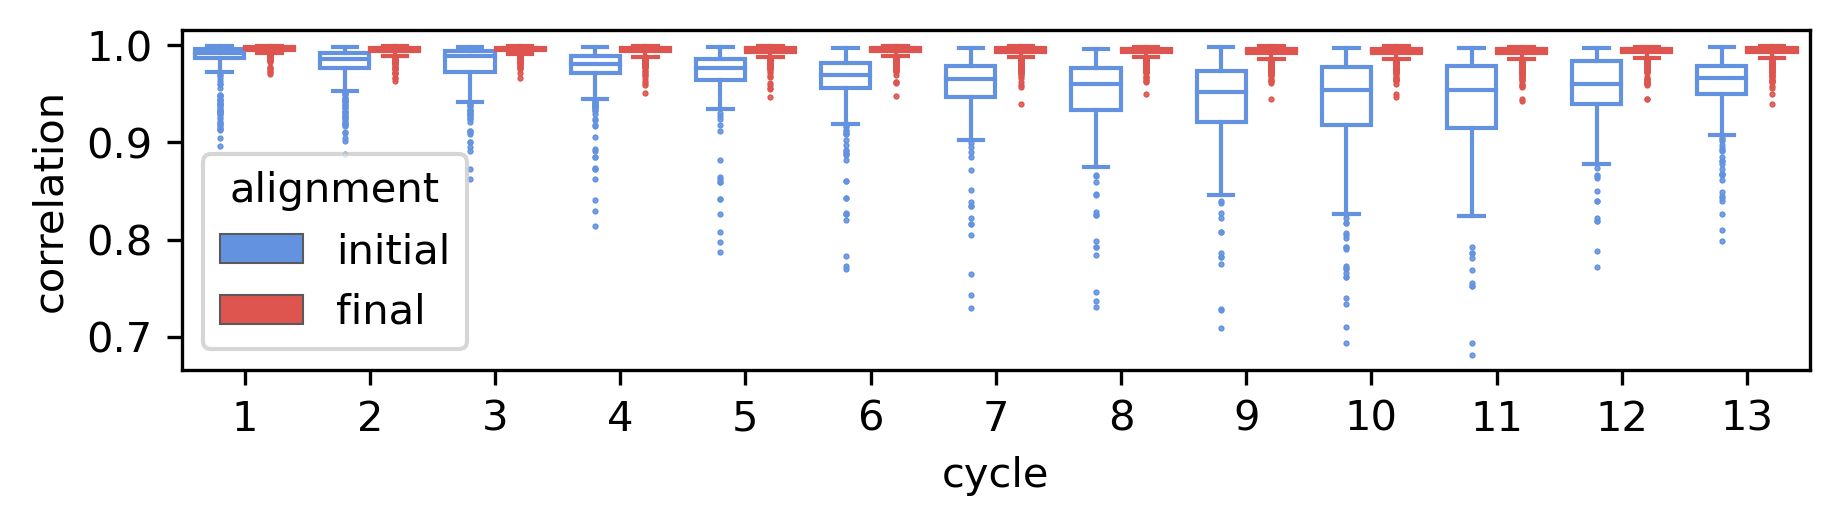

In [8]:
plt.figure(figsize=(7,1.5), dpi=300)
ax = plt.gca()
whiskerprops=dict(
#     lw=0.1,
)
kwargs = dict(ax=ax, fliersize=1, 
              linewidth=1,
              whiskerprops=whiskerprops,
              flierprops=dict(
                  marker='.', 
                  markerfacecolor='k',
                  markeredgecolor='k',
                  linestyle='none', 
                  lw=0
              ))#, boxprops=dict(lw=0.5))
sns.boxplot(x='cycle', y='correlation', hue='alignment', data=long_cycle_df, 
            palette={'initial': '#4e8ef5', 'final': '#f53f36'},
            **kwargs) 


ax.set_ylabel('correlation')

for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    col = box.get_facecolor()
    box.set_edgecolor(col)
    box.set_facecolor('None')
    
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(1)

        
plt.savefig('cycle_alignment.svg', bbox_inches='tight', transparent=True)

In [62]:
stitching_tables = !ls qc/*Bladder*/qc/stitching_data.csv

In [89]:
initial_dfs = []
final_dfs = []
for i,t in enumerate(stitching_tables):
    df = pd.read_csv(t, index_col=0, header=0)
    df = df.sort_values('initial_correlation', ascending=False)
    i_df = df.loc[:, ['initial_correlation']]
    f_df = df.loc[:, ['final_correlation']]
    i_df.index = np.arange(df.shape[0])
    f_df.index = np.arange(df.shape[0])
    i_df.columns = [i_df.columns[0]+f'_{i}']
    f_df.columns = [f_df.columns[0]+f'_{i}']
    
    initial_dfs.append(i_df.copy())
    final_dfs.append(f_df.copy())
    
initial_dfs = pd.concat(initial_dfs, axis=1)
final_dfs = pd.concat(final_dfs, axis=1)

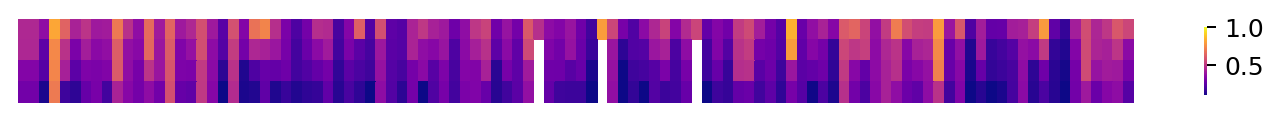

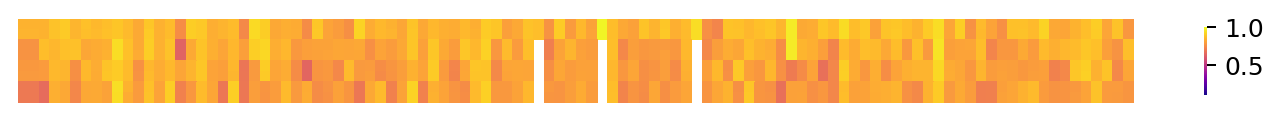

In [95]:
kwargs = dict(
    cmap='plasma',
    square=True,
    xticklabels=False,
    yticklabels=False,
    vmin=0.1, vmax=1
)
cbar_kws = dict(
    shrink=0.5
)
plt.figure(figsize=(10,1), dpi=180)
sns.heatmap(initial_dfs, cbar_kws=cbar_kws, **kwargs)
plt.savefig('stitching_initial.svg', bbox_inches='tight', transparent=True)

plt.figure(figsize=(10,1), dpi=180)
sns.heatmap(final_dfs, cbar_kws=cbar_kws, **kwargs)
plt.savefig('stitching_final.svg', bbox_inches='tight', transparent=True)


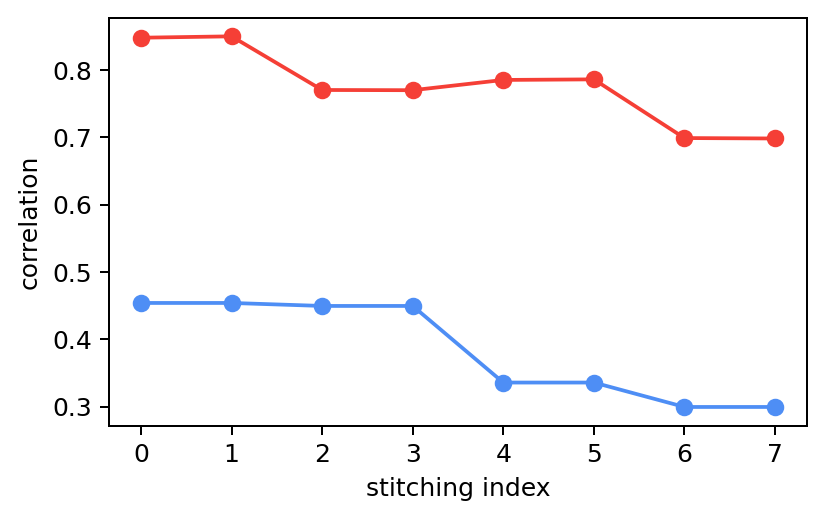

In [47]:
plt.figure(figsize=(5,3), dpi=180)
ax = plt.gca()
kwargs = dict(ax=ax)#, boxprops=dict(lw=0.5))
# sns.boxplot(x='stitching_index', y='final_correlation', data=df, color='#f53f36', **kwargs) 
# sns.boxplot(x='stitching_index', y='initial_correlation', data=df, color='#4e8ef5', **kwargs) 

ax.plot(df.stitching_index, df.initial_correlation, marker='o', color='#4e8ef5')
ax.plot(df.stitching_index, df.final_correlation, marker='o', color='#f53f36')

ax.set_ylabel('correlation')
ax.set_xlabel('stitching index')

# # iterate over boxes
# for i,box in enumerate(ax.artists):
#     box.set_edgecolor('black')
#     #box.set_facecolor('white')

#     # iterate over whiskers and median lines
#     for j in range(6*i,6*(i+1)):
#          ax.lines[j].set_color('black') 
#             ax.lines[j].set_linewidth(1)

plt.savefig('stitching.svg', bbox_inches='tight', transparent=True)